What Are The Most Demanded Skills For The 3 Most Popular Data Job Roles?

1. clean job_skills column
2. calculate skills count based on job_title_short
3. Calculate Skills Percentage
4. Plot The findings

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_NG = df[df['job_country'] == 'Nigeria']

In [3]:
df_skills = df_NG.explode('job_skills')

In [4]:
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
255,Machine Learning Engineer,python
255,Machine Learning Engineer,c++
255,Machine Learning Engineer,pytorch
255,Machine Learning Engineer,tensorflow
255,Machine Learning Engineer,nltk
...,...,...
779923,Data Scientist,spark
779923,Data Scientist,tableau
782054,Data Analyst,power bi
782054,Data Analyst,excel


In [5]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = df_skills_count.reset_index(name= 'skills_count')
df_skills_count.sort_values(by= 'skills_count', ascending= False, inplace= True)
df_skills_count

,job_title_short,job_skills,skills_count
335,Data Scientist,python,139
125,Data Analyst,excel,130
175,Data Analyst,sql,117
246,Data Engineer,python,113
261,Data Engineer,sql,109
...,...,...,...
167,Data Analyst,seaborn,1
481,Senior Data Engineer,terraform,1
482,Senior Data Engineer,vmware,1
483,Senior Data Engineer,word,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

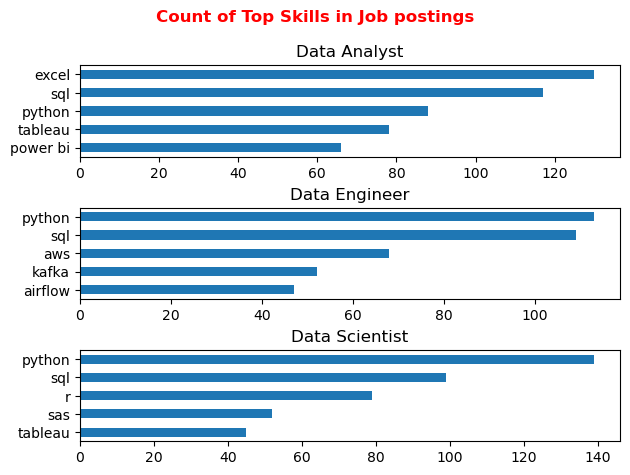

In [7]:
fig, ax= plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax= ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job postings', fontsize= 12, color= 'red', weight= "bold")
fig.tight_layout(h_pad= 0.5)
plt.show()    

In [8]:
df_job_total = df_NG['job_title_short'].value_counts()
df_job_total = df_job_total.reset_index(name= 'jobs_total')

In [9]:
df_skill_perc = df_skills_count.merge(df_job_total, how= 'left', on= 'job_title_short')

In [10]:
df_skill_perc['skills_percent']= 100 * df_skill_perc['skills_count']/df_skill_perc['jobs_total']
df_skill_perc

,job_title_short,job_skills,skills_count,jobs_total,skills_percent
0,Data Scientist,python,139,205,67.804878
1,Data Analyst,excel,130,304,42.763158
2,Data Analyst,sql,117,304,38.486842
3,Data Engineer,python,113,190,59.473684
4,Data Engineer,sql,109,190,57.368421
...,...,...,...,...,...
623,Data Analyst,seaborn,1,304,0.328947
624,Senior Data Engineer,terraform,1,33,3.030303
625,Senior Data Engineer,vmware,1,33,3.030303
626,Senior Data Engineer,word,1,33,3.030303


<Figure size 1500x600 with 0 Axes>

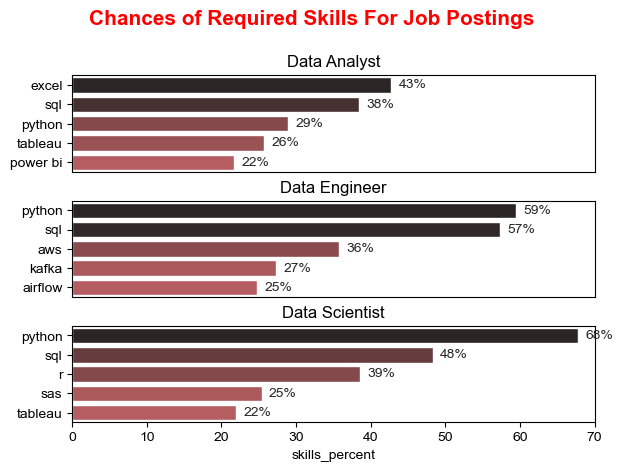

In [11]:
plt.figure(figsize= (15,6))
fig, ax= plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(df_plot, x='skills_percent', y= 'job_skills', hue= 'skills_count', palette='dark:r_r', ax=ax[i] )
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_title(job_title)
    ax[1].set_xlabel('')
    ax[i].set_xlim(0,70)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v+1, n,f'{v:.0f}%', va= 'center', fontsize= 10)

    if i!= len(job_titles) - 1:
      ax[i].set_xticks([])

    ax[0].set_xlabel('')  

fig.suptitle('Chances of Required Skills For Job Postings', fontsize= 15, color= 'red', weight= "bold")
fig.tight_layout(h_pad= 0.5)
plt.show() 

In [12]:
###